# Taller de Pandas - COVID

![image.png](attachment:image.png)

🧼 Importar Pandas

In [1]:
import pandas as pd

🧼 Leer el .csv "Covid19Argentina"

In [82]:
covid = pd.read_csv('/content/drive/MyDrive/01 - Laboral/Accenture/Data academy/6-Covid19Argentina.csv')

🧼 Imprimir los primeros 5 registros del dataframe

In [83]:
covid.head(5)

,Testing_Date,Province,Province_Code,District,District_Code,Locality,Locality_Code,Financing,Type,Total_Tests,Positive_Cases
0,2008-08-13,Jujuy,38,Dr. Manuel Belgrano,21,SAN SALVADOR DE JUJUY,60,Public,Provincial,1,0.0
1,2019-07-13,CABA,2,COMUNA 02,2,RECOLETA,10,Public,Public University,1,0.0
2,2020-02-11,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,2,0.0
3,2020-02-20,Buenos Aires,6,Bahía Blanca,56,BAHIA BLANCA,10,Private,Private,1,0.0
4,2020-02-20,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,1,0.0


🧼 Imprimir la cantidad de filas y columnas del df

In [84]:
print(f'filas: {covid.shape[0]}, columnas: {covid.shape[1]}')

filas: 17524, columnas: 11


🧼 Utiliza un metodo perteneciente a los df para imprimir las columnas, la cantidad de no-nulos de cada una y el tipo de dato

In [85]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17524 entries, 0 to 17523
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Testing_Date    17524 non-null  object 
 1   Province        17522 non-null  object 
 2   Province_Code   17524 non-null  int64  
 3   District        17524 non-null  object 
 4   District_Code   17524 non-null  int64  
 5   Locality        17524 non-null  object 
 6   Locality_Code   17524 non-null  int64  
 7   Financing       17524 non-null  object 
 8   Type            17524 non-null  object 
 9   Total_Tests     17524 non-null  int64  
 10  Positive_Cases  17522 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 1.5+ MB


🧼 Utiliza un metodo perteneciente a los df para imprimir informacion estadistica del df

In [86]:
covid.describe()

,Province_Code,District_Code,Locality_Code,Total_Tests,Positive_Cases
count,17524.000000,17524.000000,17524.000000,17524.000000,17522.000000
mean,24.615328,158.231340,53.242981,71.154873,23.326618
std,28.522829,230.802172,95.104505,148.029044,64.207189
min,2.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,12.000000,10.000000,4.000000,0.000000
50%,6.000000,35.000000,10.000000,21.000000,2.000000
75%,50.000000,260.000000,50.000000,68.000000,18.000000
max,99.000000,882.000000,560.000000,1738.000000,943.000000


⚠️¿Hay nulos en el df?⚠️

El tratamiento de los nulos es "todo un tema", pero generalmente podemos decir que hay 4 posibles vias de accion:

🦠Eliminar los registros que tienen nulos

🦠Eliminar las columnas que tengan nulos (aconsejable si hay una columna con muchisimos nulos)

🦠Rellenar los nulos con medidas estadisticas: promedio, mediana y moda

🦠Rellenar los nulos con un algoritmo de aprendizaje automatico

🧼 Imprimir solo las filas que contengan nulo en alguna columna

In [87]:
covid.isna().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
17519    False
17520    False
17521    False
17522    False
17523    False
Length: 17524, dtype: bool

In [88]:
covid.loc[covid.isna().any(axis=1),:]

,Testing_Date,Province,Province_Code,District,District_Code,Locality,Locality_Code,Financing,Type,Total_Tests,Positive_Cases
9,2020-03-02,NaN,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,5,0.0
12,2020-03-05,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,7,NaN
20,2020-03-11,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,34,NaN
60,2020-03-21,NaN,6,Bahía Blanca,56,BAHIA BLANCA,10,Private,Private,2,0.0


🧼 Eliminar los registros que tienen nulos

In [89]:
covid.dropna(inplace=True)

In [90]:
covid.shape

(17520, 11)

⚠️A partir de ahora trabajaremos con el df sin nulos⚠️

🧼 Ordenar el df en orden descendente tomando como referencia Testing_Date

In [91]:
covid.sort_values('Testing_Date', ascending=False)

,Testing_Date,Province,Province_Code,District,District_Code,Locality,Locality_Code,Financing,Type,Total_Tests,Positive_Cases
17523,2020-08-29,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,1,0.0
17402,2020-08-27,CABA,2,COMUNA 02,2,RECOLETA,10,Private,Private,716,290.0
17420,2020-08-27,Neuquén,58,Confluencia,35,NEUQUEN,70,Private,Private,35,21.0
17419,2020-08-27,Buenos Aires,6,General San Martín,371,GENERAL SAN MARTÍN,10,Public,Provincial,25,10.0
17418,2020-08-27,Buenos Aires,6,San Miguel,760,BELLA VISTA,10,Public,Municipal,114,72.0
...,...,...,...,...,...,...,...,...,...,...,...
4,2020-02-20,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,1,0.0
3,2020-02-20,Buenos Aires,6,Bahía Blanca,56,BAHIA BLANCA,10,Private,Private,1,0.0
2,2020-02-11,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,2,0.0
1,2019-07-13,CABA,2,COMUNA 02,2,RECOLETA,10,Public,Public University,1,0.0


🧼 Ordenar el df en orden ascendente tomando como referencia Testing_Date

In [92]:
covid.sort_values('Testing_Date', ascending=True)

,Testing_Date,Province,Province_Code,District,District_Code,Locality,Locality_Code,Financing,Type,Total_Tests,Positive_Cases
0,2008-08-13,Jujuy,38,Dr. Manuel Belgrano,21,SAN SALVADOR DE JUJUY,60,Public,Provincial,1,0.0
1,2019-07-13,CABA,2,COMUNA 02,2,RECOLETA,10,Public,Public University,1,0.0
2,2020-02-11,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,2,0.0
3,2020-02-20,Buenos Aires,6,Bahía Blanca,56,BAHIA BLANCA,10,Private,Private,1,0.0
4,2020-02-20,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17417,2020-08-27,Río Negro,62,General Roca,42,CIPOLLETTI,400,Public,Provincial,1,0.0
17418,2020-08-27,Buenos Aires,6,San Miguel,760,BELLA VISTA,10,Public,Municipal,114,72.0
17419,2020-08-27,Buenos Aires,6,General San Martín,371,GENERAL SAN MARTÍN,10,Public,Provincial,25,10.0
17401,2020-08-27,Buenos Aires,6,Malvinas Argentinas,515,PABLO NOGUES,60,Public,Municipal,41,21.0


⚠️¿Podes ver alguna incongruencia en los datos?⚠️

🧼Eliminar los registros cuyo Testing_Date sea anterior al primer registro de covid en China: 17 de Noviembre de 2019

In [93]:
covid = covid.loc[(covid['Testing_Date']> '2019-11-17'),]

🧼Resetear el indice del df:

In [94]:
covid.reset_index(drop = True, inplace = True)
covid

,Testing_Date,Province,Province_Code,District,District_Code,Locality,Locality_Code,Financing,Type,Total_Tests,Positive_Cases
0,2020-02-11,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,2,0.0
1,2020-02-20,Buenos Aires,6,Bahía Blanca,56,BAHIA BLANCA,10,Private,Private,1,0.0
2,2020-02-20,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,1,0.0
3,2020-02-25,Santiago del Estero,86,Capital City,49,SANTIAGO DEL ESTERO,110,Public,Provincial,1,0.0
4,2020-02-27,Santiago del Estero,86,Capital City,49,SANTIAGO DEL ESTERO,110,Public,Provincial,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17513,2020-08-27,Jujuy,38,Palpalá,42,PALPALA,40,Private,Private,3,2.0
17514,2020-08-27,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Private,Private,8,0.0
17515,2020-08-27,Buenos Aires,6,Florencio Varela,274,VILLA VATTEONE,10,Public,Provincial,23,11.0
17516,2020-08-27,CABA,2,COMUNA 09,9,LINIERS,10,Public,Municipal,2,1.0


🧼Analizar la distribucion de registros en las diferentes provincias

In [95]:
covid.loc[:,'Province'].value_counts()

Buenos Aires           5664
CABA                   4527
Río Negro               991
Mendoza                 818
Santa Fe                726
Chubut                  487
Córdoba                 424
Chaco                   406
Santa Cruz              339
Neuquén                 319
Jujuy                   305
Salta                   292
Tucumán                 259
La Rioja                253
Entre Ríos              245
La Pampa                214
Tierra del Fuego        179
Corrientes              172
San Juan                165
Santiago del Estero     158
Misiones                148
Formosa                 142
San Luis                135
Catamarca               123
NOT SPECIFIED            27
Name: Province, dtype: int64

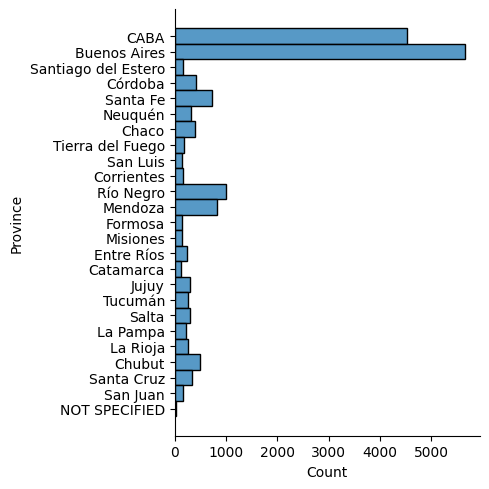

In [96]:
import seaborn as sns
sns.displot(data = covid, y = 'Province')

🧼Calcular la cantidad de valores unicos en la columna Province

In [97]:
covid.loc[:,'Province'].nunique() # es distinct count

25

⚠️Vemos que la cantidad de valores unicos coincide con las 24 jurisdicciones: 23 provincias y Capital Federal + Una categoria "NOT SPECIFIED"

🦠Analizar la distribucion de registros por Financing y Type

In [98]:
covid.loc[:,"Financing"].value_counts()

Public     11290
Private     6228
Name: Financing, dtype: int64

In [99]:
covid.loc[:,"Type"].value_counts()

Provincial            6730
Private               5824
Municipal             2622
National              1067
Public University      438
Armed forces           426
Social Security        244
Mixed                  154
Prison Service           7
Private University       3
Mutual                   3
Name: Type, dtype: int64

In [100]:
covid.loc[:, 'Province'].mode()

0    Buenos Aires
Name: Province, dtype: object

🦠Agregar una nueva columna llamada "Alerta" la cual tendra 1 si la cantidad de casos positivos supera la mediana, en caso contrario un 0

In [101]:
import numpy as np

In [102]:
mediana = covid.loc[:,'Positive_Cases'].median()


In [103]:
covid['Alerta']= np.where(covid["Positive_Cases"]> mediana, 1 , 0) # por qué con np?

In [68]:
covid

,Testing_Date,Province,Province_Code,District,District_Code,Locality,Locality_Code,Financing,Type,Total_Tests,Positive_Cases,Alerta
0,2020-02-11,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,2,0.0,0
1,2020-02-20,Buenos Aires,6,Bahía Blanca,56,BAHIA BLANCA,10,Private,Private,1,0.0,0
2,2020-02-20,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,1,0.0,0
3,2020-02-25,Santiago del Estero,86,Capital City,49,SANTIAGO DEL ESTERO,110,Public,Provincial,1,0.0,0
4,2020-02-27,Santiago del Estero,86,Capital City,49,SANTIAGO DEL ESTERO,110,Public,Provincial,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17513,2020-08-27,Jujuy,38,Palpalá,42,PALPALA,40,Private,Private,3,2.0,0
17514,2020-08-27,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Private,Private,8,0.0,0
17515,2020-08-27,Buenos Aires,6,Florencio Varela,274,VILLA VATTEONE,10,Public,Provincial,23,11.0,1
17516,2020-08-27,CABA,2,COMUNA 09,9,LINIERS,10,Public,Municipal,2,1.0,0


🦠 Hay una forma mucho mas facil:

In [41]:
#covid['Alerta2']= lambda x: 1 if covid["Positive_Cases"] > covid["Positive_Cases"].median() else 0

In [119]:
covid['Alerta2']= covid["Positive_Cases"].apply(lambda x: 1 if x > covid.loc[:,'Positive_Cases'].median() else 0)

In [120]:
covid

,Testing_Date,Province,Province_Code,District,District_Code,Locality,Locality_Code,Financing,Type,Total_Tests,Positive_Cases,Alerta,Alerta2
0,2020-02-11,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,2,0.0,0,0
1,2020-02-20,Buenos Aires,6,Bahía Blanca,56,BAHIA BLANCA,10,Private,Private,1,0.0,0,0
2,2020-02-20,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,1,0.0,0,0
3,2020-02-25,Santiago del Estero,86,Capital City,49,SANTIAGO DEL ESTERO,110,Public,Provincial,1,0.0,0,0
4,2020-02-27,Santiago del Estero,86,Capital City,49,SANTIAGO DEL ESTERO,110,Public,Provincial,1,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17513,2020-08-27,Jujuy,38,Palpalá,42,PALPALA,40,Private,Private,3,2.0,0,0
17514,2020-08-27,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Private,Private,8,0.0,0,0
17515,2020-08-27,Buenos Aires,6,Florencio Varela,274,VILLA VATTEONE,10,Public,Provincial,23,11.0,1,1
17516,2020-08-27,CABA,2,COMUNA 09,9,LINIERS,10,Public,Municipal,2,1.0,0,0


😵 **Ejercicios** 😵

✔️1.Crear una nueva columna llamada Positividad la cual sea igual a la division de los casos positivos entre el total de tests

In [130]:
covid['Positividad'] = covid['Positive_Cases'] / covid['Total_Tests']

In [131]:
covid

,Testing_Date,Province,Province_Code,District,District_Code,Locality,Locality_Code,Financing,Type,Total_Tests,Positive_Cases,Alerta,Alerta2,Positividad
0,2020-02-11,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,2,0.0,0,0,0.000000
1,2020-02-20,Buenos Aires,6,Bahía Blanca,56,BAHIA BLANCA,10,Private,Private,1,0.0,0,0,0.000000
2,2020-02-20,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,1,0.0,0,0,0.000000
3,2020-02-25,Santiago del Estero,86,Capital City,49,SANTIAGO DEL ESTERO,110,Public,Provincial,1,0.0,0,0,0.000000
4,2020-02-27,Santiago del Estero,86,Capital City,49,SANTIAGO DEL ESTERO,110,Public,Provincial,1,0.0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17513,2020-08-27,Jujuy,38,Palpalá,42,PALPALA,40,Private,Private,3,2.0,0,0,0.666667
17514,2020-08-27,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Private,Private,8,0.0,0,0,0.000000
17515,2020-08-27,Buenos Aires,6,Florencio Varela,274,VILLA VATTEONE,10,Public,Provincial,23,11.0,1,1,0.478261
17516,2020-08-27,CABA,2,COMUNA 09,9,LINIERS,10,Public,Municipal,2,1.0,0,0,0.500000


✔️2.Obtener un dataframe con solo registros de CABA y tengan localidad en parque patricios

In [123]:
covid.loc[covid['Locality'] == 'PARQUE PATRICIOS',:]

,Testing_Date,Province,Province_Code,District,District_Code,Locality,Locality_Code,Financing,Type,Total_Tests,Positive_Cases,Alerta,Alerta2
0,2020-02-11,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,2,0.0,0,0
2,2020-02-20,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,1,0.0,0,0
5,2020-02-27,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,4,0.0,0,0
6,2020-02-28,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,10,0.0,0,0
7,2020-03-03,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,8,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17333,2020-08-26,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,58,15.0,1,1
17456,2020-08-27,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,51,24.0,1,1
17478,2020-08-27,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,Municipal,8,1.0,0,0
17514,2020-08-27,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Private,Private,8,0.0,0,0


✔️3.Obtener un dataframe con solo registros de Buenos Aires que sean de tipo privado y tengan casos positivos superiores a 10, finalmente ordena de forma descendente

In [132]:
covid.loc[(covid['Province'] == 'Buenos Aires') & (covid['Type'] == 'Private') & (covid['Positive_Cases'] > 10)].sort_values('Positive_Cases', ascending = False)

,Testing_Date,Province,Province_Code,District,District_Code,Locality,Locality_Code,Financing,Type,Total_Tests,Positive_Cases,Alerta,Alerta2,Positividad
11318,2020-07-24,Buenos Aires,6,Bahía Blanca,56,BAHIA BLANCA,10,Private,Private,376,130.0,1,1,0.345745
17078,2020-08-25,Buenos Aires,6,La Plata,441,LA PLATA,30,Private,Private,272,121.0,1,1,0.444853
13926,2020-08-08,Buenos Aires,6,Bahía Blanca,56,BAHIA BLANCA,10,Private,Private,384,111.0,1,1,0.289062
14922,2020-08-14,Buenos Aires,6,Bahía Blanca,56,BAHIA BLANCA,10,Private,Private,245,109.0,1,1,0.444898
15876,2020-08-19,Buenos Aires,6,La Plata,441,LA PLATA,30,Private,Private,255,108.0,1,1,0.423529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,2020-07-09,Buenos Aires,6,Quilmes,658,QUILMES OESTE,10,Private,Private,31,11.0,1,1,0.354839
12167,2020-07-29,Buenos Aires,6,San Isidro,756,MARTINEZ,10,Private,Private,100,11.0,1,1,0.110000
9352,2020-07-10,Buenos Aires,6,La Matanza,427,RAMOS MEJIA,10,Private,Private,25,11.0,1,1,0.440000
14304,2020-08-10,Buenos Aires,6,San Miguel,760,SAN MIGUEL,10,Private,Private,27,11.0,1,1,0.407407


✔️4.Obtener un dataframe con registros que pertenezcan a Buenos Aires o tengan mas de 10 test realizados

In [134]:
covid.loc[(covid['Province'] == 'Buenos Aires') | (covid['Total_Tests'] > 10)]

,Testing_Date,Province,Province_Code,District,District_Code,Locality,Locality_Code,Financing,Type,Total_Tests,Positive_Cases,Alerta,Alerta2,Positividad
1,2020-02-20,Buenos Aires,6,Bahía Blanca,56,BAHIA BLANCA,10,Private,Private,1,0.0,0,0,0.000000
9,2020-03-06,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,11,7.0,1,1,0.636364
12,2020-03-08,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,28,3.0,1,1,0.107143
13,2020-03-09,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,13,7.0,1,1,0.538462
15,2020-03-10,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,28,2.0,0,0,0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17509,2020-08-27,Mendoza,50,Guaymallén,28,GUAYMALLEN,20,Public,Provincial,45,23.0,1,1,0.511111
17510,2020-08-27,Jujuy,38,El Carmen,14,PERICO,90,Public,Provincial,18,12.0,1,1,0.666667
17511,2020-08-27,Buenos Aires,6,Lomas de Zamora,490,TEMPERLEY,10,Public,Provincial,34,12.0,1,1,0.352941
17512,2020-08-27,Misiones,54,Capital City,28,POSADAS (MUNICIPIO DE POSADAS),30,Public,Provincial,28,0.0,0,0,0.000000


✔️5.Obtener un dataframe que contenga solo los registros cuya provincia contenga el string "San"

In [135]:
covid.loc[covid['Province'].str.contains('San'),]

,Testing_Date,Province,Province_Code,District,District_Code,Locality,Locality_Code,Financing,Type,Total_Tests,Positive_Cases,Alerta,Alerta2,Positividad
3,2020-02-25,Santiago del Estero,86,Capital City,49,SANTIAGO DEL ESTERO,110,Public,Provincial,1,0.0,0,0,0.000000
4,2020-02-27,Santiago del Estero,86,Capital City,49,SANTIAGO DEL ESTERO,110,Public,Provincial,1,0.0,0,0,0.000000
11,2020-03-08,Santiago del Estero,86,Capital City,49,SANTIAGO DEL ESTERO,110,Public,Provincial,1,0.0,0,0,0.000000
16,2020-03-11,Santa Fe,82,Rosario,84,ROSARIO,270,Private,Private,1,0.0,0,0,0.000000
32,2020-03-18,Santa Fe,82,Rosario,84,ROSARIO,270,Public,Municipal,1,0.0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17440,2020-08-27,Santa Fe,82,Caseros,14,CASILDA,50,Public,Provincial,1,0.0,0,0,0.000000
17441,2020-08-27,Santa Fe,82,Rosario,84,ROSARIO,270,Private,Private,42,40.0,1,1,0.952381
17447,2020-08-27,Santa Fe,82,Caseros,14,CASILDA,50,Private,Private,1,0.0,0,0,0.000000
17480,2020-08-27,Santiago del Estero,86,Capital City,49,SANTIAGO DEL ESTERO,110,Public,Provincial,1,0.0,0,0,0.000000


✔️6.Obtener un dataframe que contenga solo registros cuyos casos positivos se encuentren entre 10 y 20

In [136]:
covid.loc[covid['Positive_Cases'].between(10,20)]

,Testing_Date,Province,Province_Code,District,District_Code,Locality,Locality_Code,Financing,Type,Total_Tests,Positive_Cases,Alerta,Alerta2,Positividad
18,2020-03-12,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,45,12.0,1,1,0.266667
23,2020-03-15,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,80,11.0,1,1,0.137500
26,2020-03-16,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,103,12.0,1,1,0.116505
27,2020-03-17,CABA,2,COMUNA 04,4,PARQUE PATRICIOS,10,Public,National,123,19.0,1,1,0.154472
67,2020-03-22,Santa Fe,82,Rosario,84,ROSARIO,270,Public,Municipal,30,12.0,1,1,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17486,2020-08-27,Neuquén,58,Confluencia,35,NEUQUEN,70,Public,Provincial,15,15.0,1,1,1.000000
17496,2020-08-27,Buenos Aires,6,Ezeiza,270,AEROPUERTO INTERNACIONAL EZEIZA,10,Public,Provincial,50,15.0,1,1,0.300000
17510,2020-08-27,Jujuy,38,El Carmen,14,PERICO,90,Public,Provincial,18,12.0,1,1,0.666667
17511,2020-08-27,Buenos Aires,6,Lomas de Zamora,490,TEMPERLEY,10,Public,Provincial,34,12.0,1,1,0.352941


✔️7.Obtener SOLO el registro que contenga la mayor cantidad de casos positivos, posteriormente hacer un print de estos casos (sin copiar el dato a mano)

In [137]:
maximo = covid.sort_values('Positive_Cases').tail(1)

In [138]:
list(maximo.loc[:,'Positive_Cases'])[0]


943.0

In [ ]:
maximo.loc[:,'Positive_Cases'].values[0]

943.0

✔️8.Cual es el porcentaje de registros que pertenecen a CABA?

In [158]:
df = covid.loc[:,'Province'].value_counts(normalize = True).to_frame() # normalize = True sirve para calcular la proporción del total


In [159]:
df.columns = ['Porcentaje'] # columns evita usar loc para seleccionar columnas
df['Porcentaje'] = df['Porcentaje']* 100

In [160]:
df2 = df.reset_index()

In [161]:
df2.columns = ['Province', 'Porcentaje']

In [162]:
df2.loc[df2['Province'] =='CABA', 'Porcentaje']

1    25.841991
Name: Porcentaje, dtype: float64

In [163]:
list(df2.loc[df2['Province'] =='CABA', 'Porcentaje'])

[25.841991094873844]

In [164]:
porcentaje_caba = list(df2.loc[df2['Province'] =='CABA', 'Porcentaje'])[0] # QUÉ PASA ACÁ?

In [165]:
porcentaje_caba

25.841991094873844

# GROUP BY

![image.png](attachment:image.png)

In [169]:
valor = [1,9,11,3,2,6,8,4,4,11,2,2,4,3,2,12,8]
color = ['AM','VE','VE','AM','AM','AM','VE','AZ','AM','VE','AM','AZ','AM','AZ','AZ','VE','VE']

In [170]:
df = pd.DataFrame({'color':color,'valor':valor})

🦠Vemos como agrupó

In [168]:
#df.groupby('color').groups  #devuelve los grupos enm listas

In [171]:
df.groupby('color', as_index = False).sum()

,color,valor
0,AM,22
1,AZ,11
2,VE,59


In [172]:
covid.groupby('Province', as_index = False)['Positive_Cases'].sum().sort_values('Positive_Cases', ascending = False)


,Province,Positive_Cases
1,CABA,235696.0
0,Buenos Aires,115422.0
6,Córdoba,8080.0
21,Santa Fe,7221.0
9,Jujuy,6076.0
12,Mendoza,5820.0
3,Chaco,5654.0
16,Río Negro,5566.0
17,Salta,4055.0
15,Neuquén,3309.0


In [173]:
covid.groupby('Province')['Positive_Cases'].sum().sort_values(ascending=False)

Province
CABA                   235696.0
Buenos Aires           115422.0
Córdoba                  8080.0
Santa Fe                 7221.0
Jujuy                    6076.0
Mendoza                  5820.0
Chaco                    5654.0
Río Negro                5566.0
Salta                    4055.0
Neuquén                  3309.0
Entre Ríos               2797.0
Tucumán                  1915.0
Tierra del Fuego         1669.0
Santa Cruz               1640.0
La Rioja                 1399.0
Santiago del Estero       723.0
Chubut                    690.0
San Juan                  218.0
Corrientes                215.0
La Pampa                  196.0
Formosa                   145.0
Catamarca                  80.0
San Luis                   74.0
Misiones                   40.0
NOT SPECIFIED              29.0
Name: Positive_Cases, dtype: float64

🦠Agrupar el df de covid por Provincia, realizando una agregacion de suma en la columna de casos positivos, ordenar de forma descendente por numero de casos

In [174]:
covid.groupby(['Province', 'Financing'], as_index = False)['Positive_Cases'].sum().sort_values('Positive_Cases', ascending = False)

,Province,Financing,Positive_Cases
3,CABA,Public,121738.0
2,CABA,Private,113958.0
1,Buenos Aires,Public,89521.0
0,Buenos Aires,Private,25901.0
13,Córdoba,Public,7616.0
18,Jujuy,Public,5723.0
24,Mendoza,Public,5490.0
7,Chaco,Public,5397.0
31,Río Negro,Public,5220.0
41,Santa Fe,Public,4153.0


🧼 Que paso?

🧼 Agrupar el df de covid por Provincia y por tipo de financiamiento, realizando una agregacion de suma en la columna de casos positivos, ordenar de forma descendente por numero de casos

In [ ]:
#.agg({'Positive_Cases':'sum'}, 'Total_Tests':'min') recibe un diccionario

In [ ]:
covid.groupby(["Province", "Financing"], as_index = False).agg({'Positive_Cases':'sum', 'Total_Tests':'min'}).sort_values("Positive_Cases", ascending = False)

,Province,Financing,Positive_Cases,Total_Tests
3,CABA,Public,121738.0,1
2,CABA,Private,113958.0,1
1,Buenos Aires,Public,89521.0,1
0,Buenos Aires,Private,25901.0,1
13,Córdoba,Public,7616.0,1
18,Jujuy,Public,5723.0,1
24,Mendoza,Public,5490.0,1
7,Chaco,Public,5397.0,1
31,Río Negro,Public,5220.0,1
41,Santa Fe,Public,4153.0,1


# DATAFRAME ARGENTINA

🧉 Abrir el csv argentina.csv

In [175]:
arg = pd.read_csv(r'C:\Users\conra\Desktop\Python\argentina.csv')
arg

FileNotFoundError: ignored

🧉 Imprimir los primeros registros

In [ ]:
arg.head()

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.38324,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.34414,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.71414,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,5.60242,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.51758,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605


In [ ]:
arg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   province                22 non-null     object 
 1   gdp                     22 non-null     float64
 2   illiteracy              22 non-null     float64
 3   poverty                 22 non-null     float64
 4   deficient_infra         22 non-null     float64
 5   school_dropout          22 non-null     float64
 6   no_healthcare           22 non-null     float64
 7   birth_mortal            22 non-null     float64
 8   pop                     22 non-null     int64  
 9   movie_theatres_per_cap  22 non-null     float64
 10  doctors_per_cap         22 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.0+ KB


In [ ]:
arg.shape

(22, 11)

In [ ]:
arg.describe()

,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
count,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000
mean,3.055703e+07,3.225541,9.925625,12.677304,1.724866,50.768836,4.986364,1.686352e+06,0.000007,0.004894
std,6.183100e+07,1.851496,3.779530,7.216860,1.152438,9.181037,3.498339,3.219828e+06,0.000004,0.001522
min,3.807057e+06,0.791485,3.398774,3.839852,0.204093,29.232100,0.800000,2.739640e+05,0.000002,0.002821
25%,8.041587e+06,1.989810,7.472754,7.569677,0.812617,45.548300,3.025000,5.143715e+05,0.000004,0.004061
50%,1.096416e+07,2.743675,9.142440,10.865881,1.437767,49.370500,4.000000,7.775305e+05,0.000006,0.004757
75%,1.999452e+07,3.686190,12.500143,16.100647,2.514496,56.915800,5.875000,1.230606e+06,0.000009,0.005334
max,2.926899e+08,7.517580,17.035583,31.479527,3.864265,65.812600,16.200000,1.562508e+07,0.000019,0.010175


# MERGE

🧉 Queremos agregar al dataframe que tiene datos socio economico de argentina la informacion de la cantidad total de positivos covid de dicha provincia

In [ ]:
covid.groupby('Province', as_index= False)['Positive_Cases'].sum()

,Province,Positive_Cases
0,Buenos Aires,115422.0
1,CABA,235696.0
2,Catamarca,80.0
3,Chaco,5654.0
4,Chubut,690.0
5,Corrientes,215.0
6,Córdoba,8080.0
7,Entre Ríos,2797.0
8,Formosa,145.0
9,Jujuy,6076.0


🧉 Realizar un LEFT JOIN, donde se une la tabla de datos socioeconomicos (izquierda) y la de covid (derecha), utilizando como clave el nombre de las provincias

![image.png](attachment:image.png)

🧉 Para hacer esto tenemos que estar seguros que las provincias se escriban exactamente de igual forma en ambas tablas

In [ ]:
#You are looking for the symmetric difference; all elements that appear only in set a or in set b, but not both:



🧉 Vemos que en covid hay 3 mas: CABA (que en el otro dataset unifica caba y bs as), NOT SPECIFIED Y Tierra del Fuergo

🧉 Hay que combinar los registros de Buenos Aires y CABA en el dataset de covid

⚡ ⚡ ⚡ ⚡ **Bonus Track** ⚡ ⚡ ⚡ ⚡

🧉 1.Analizá a groso modo la siguiente hipotesis:

🧉 2.Hay una correlacion entre la poblacion de una provincia y la cantidad de casos positivos

🧉 3.Hay una correlacion entre el PBI per capita de una provincia y la cantidad de casos positivos per capita

🧉 4.Hay una correlacion entre el PBI per capita de una pronvincia y su infraestructura

🧉 5.Hay una correlacion entre la cantidad de cines per capita y la pobreza de un provincia

🧉 6.Hay una correlacion entre la cantidad de doctores per capita que hay en una provincia y los casos positivos per capita existen.




🧉 1.Hay una correlacion entre la poblacion de una provincia y la cantidad de casos positivos


**Pearson: relacion lineal**

**Spearman: relacion monotona**

⚡Si las variables se relacionan de forma no monotona ningun coeficiente de estos puede captar dicha relacion por lo cual:

⚡ **Un coeficiente de correlación bajo no necesariamente implica que las variables sean independendientes.**

⚡En una relación monótona, las variables tienden a moverse en la misma dirección relativa, pero no necesariamente a un ritmo constante. En una relación lineal, las variables se mueven en la misma dirección a un ritmo constante.

![image-2.png](attachment:image-2.png)

![image.png](attachment:image.png)